# Orthogonal projections

Из геометрии мы знаем, что для нахождения **проекции** вектора на прямую или плоскость, надо из его конца опустить перпендикуляр. Вектор, указывающий в точку пересечения перпенидкуляра с прямой/плоскостью, и будет искомой (ортогональной) проекцией. В этом разделе мы займёмся ортогональным проектированием на произвольное подпространство $\mathbb R^n$. 

Проекции хороши тем, что позволяют находить ближайшую точку из заданного подпространства. На этом свойстве основан метод наименьших квадратов и такой классический метод машинного обучения как линейная регрессия.

## Projection onto a line

Пусть прямая в $\mathbb R^n$ задана ненулевым вектором $\boldsymbol a = (a_1, \ldots, a_n)^\mathsf{T}$, и мы хотим найти на этой прямой точку $\boldsymbol p$, ближайшую к заданной точке $\boldsymbol x$. Для этого вектор $\boldsymbol x$ надо спроектировать на прямую $\mathrm{span}(\boldsymbol a)$; результатом проекции и будет вектор $\boldsymbol p = c \boldsymbol a$. Проекция $\boldsymbol p$ характеризуется свойством $\boldsymbol x - \boldsymbol p \perp \boldsymbol a$, из которого мы и найдём число $c$:

```{math}
:label: 1d-projection
    \boldsymbol a^\mathsf{T}(\boldsymbol x - \boldsymbol p) = 0 \iff 
    \boldsymbol a^\mathsf{T}\boldsymbol x - c\boldsymbol a^\mathsf{T}\boldsymbol a = 0 \iff
    c = \frac{\boldsymbol a^\mathsf{T}\boldsymbol x}{\boldsymbol a^\mathsf{T}\boldsymbol a}. 
```

Итак, наша проекция равна $\boldsymbol p = \frac{\boldsymbol a^\mathsf{T}\boldsymbol x}{\boldsymbol a^\mathsf{T}\boldsymbol a} \boldsymbol a$.
Если вектор $\boldsymbol a$ единичный, то формула для проекции упрощается до $\boldsymbol p = \langle \boldsymbol a, \boldsymbol x\rangle \boldsymbol a$.

Отметим два простых, но важных частных случая проекции на прямую:

1. Если точка $\boldsymbol x$ уже лежит на прямой $\mathrm{span}(\boldsymbol a)$, $\boldsymbol x = d \boldsymbol a$, то

    $$
        \boldsymbol p = \frac{d\boldsymbol a^\mathsf{T}\boldsymbol a}{\boldsymbol a^\mathsf{T}\boldsymbol a} \boldsymbol a = d \boldsymbol a = \boldsymbol b.
    $$

    В этом случае проектируемая точка уже лежит на прямой, поэтому ничего искать не надо: её проекция совпадает с ней самой.

2. Если $\boldsymbol x \perp a$, то $\boldsymbol a^\mathsf{T}\boldsymbol x = 0$ и $\boldsymbol p = \boldsymbol 0$. Это хорошо известное из геометрии и физики свойство: проекция перпендикулярного вектора равна нулю.

Проектирование вектора $\boldsymbol x$ на прямую $\mathrm{span}(\boldsymbol a)$ можно записать в виде умножения на одноранговую матрицу $\boldsymbol P$:

$$
    \boldsymbol p = \boldsymbol {Px}, \quad \boldsymbol P = \frac{\boldsymbol a \boldsymbol a^\mathsf{T}}{\boldsymbol a^\mathsf{T} \boldsymbol a}.
$$

Матрица $\boldsymbol P$ является частным случаем **матрицы проекции** и обладает свойством $\boldsymbol P^2 = \boldsymbol P$.

## Simple linear regression

Consider a simple linear regression model without intercept: $y = a x$. Given training dataset $\mathcal D = \{(x_i, y_i)\}_{i=1}^n$, how to find optimal value of $a$?

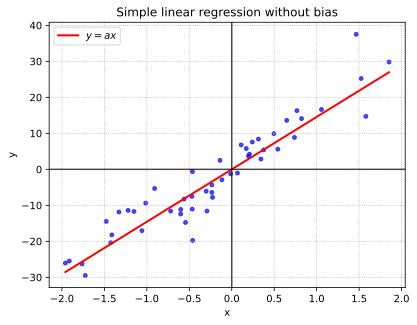

In [12]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=50, n_features=1, noise = 5.0, random_state=42)
x = X.squeeze()
a = np.sum(x*y) /  np.sum(x ** 2)

%config InlineBackend.figure_format = 'svg'
plt.scatter(X.squeeze(), y, s=15, c='b', alpha=0.7)
xs = np.linspace(x.min(), x.max(), num=10)
plt.plot(xs, a*xs, c='r', lw=2, label=r"$y = a x$")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(alpha=0.7, c='k')
plt.axvline(alpha=0.7, c='k')
plt.title("Simple linear regression without bias")
plt.legend()
plt.grid(ls=":");

In linear regression we minimize the distance from the target vector $\boldsymbol y = (y_1, \ldots, y_n)$ and the line specified by the feature vector $\boldsymbol x = (x_1, \ldots, x_n)$. According {eq}`1d-projection` we can achieve this by putting

```{math}
:label: best-slope-lr-no-bias
    \widehat a = \frac{\boldsymbol x^\mathsf{T} \boldsymbol y}{\boldsymbol x^\mathsf{T} \boldsymbol x} = \frac{\sum\limits_{i=1}^n x_i y_i}{\sum\limits_{i=1}^n x_i^2}
```

## Projection onto a subspace

Теперь займёмся поиском проекции вектора $\boldsymbol x \in \mathbb R^m$ на подпространство $\mathrm{span}(\boldsymbol a_1, \ldots, \boldsymbol a_n)$, $n\leqslant m$. Будем считать, что все векторы $\boldsymbol a_1, \ldots, \boldsymbol a_n$ линейно независимы (в противном случае выкинем лишние). Проекция $\boldsymbol p$ вектора $\boldsymbol x$ представляет собой линейную комбинацию 

$$
    \boldsymbol p = c_1 \boldsymbol a_1 + \ldots + c_n\boldsymbol a_n, 
$$

что эквивалентно матрично-векторному умножению

$$
    \boldsymbol p = \boldsymbol {Ac}, \quad \boldsymbol A = [\boldsymbol a_1 \ldots \boldsymbol a_n], \quad \boldsymbol c = (c_1,\ldots, c_n)^\mathsf{T}.
$$

Вектор $\boldsymbol x - \boldsymbol p$ должен быть ортогонален подпространству $\mathrm{span(\boldsymbol a_1, \ldots, \boldsymbol a_n)}$, поэтому $\boldsymbol x - \boldsymbol{Ac} \perp \boldsymbol a_j$ при всех $j=1, \ldots, n$, т.е.

$$
    \boldsymbol a_j^\mathsf{T} (\boldsymbol x - \boldsymbol{Ac}) = 0, \; 1 \leqslant j \leqslant n, \;\iff\;
    \boldsymbol A^\mathsf{T} (\boldsymbol x - \boldsymbol{Ac}) = \boldsymbol 0.
$$

Таким образом, справедливо равенство $\boldsymbol A^\mathsf{T} \boldsymbol x = \boldsymbol A^\mathsf{T} \boldsymbol{Ac}$. Поскольку $\mathrm{rank}(\boldsymbol A) =n$, матрица $\boldsymbol A^\mathsf{T} \boldsymbol A$ обратима, и можно домножить предыдущее равенство на $(\boldsymbol A^\mathsf{T} \boldsymbol A)^{-1}$.

<!--
Чтобы найти отсюда вектор коэффициентов $\boldsymbol c$ и проекцию $\boldsymbol p = \boldsymbol {Ac}$, требуется обратить квадратную матрицу $\boldsymbol A^\mathsf{T} \boldsymbol A$. Но обратима ли она?

**Упражнение**. Докажите, что матрица $\boldsymbol A^\mathsf{T} \boldsymbol A$ невырождена тогда и только тогда, когда столбцы матрицы $\boldsymbol A \in \mathbb R^{m\times n}$ линейно независимы.


```{admonition} Proof
:class: dropdown
Матрица $\boldsymbol A^\mathsf{T} \boldsymbol A$ квадратная размера $n\times n$. Достаточно доказать, что $N(\boldsymbol A^\top \boldsymbol A) = N(\boldsymbol A)$, поскольку нулевое ядро эквивалентно линейной независимости столбцов матрицы.

Если $\boldsymbol x \in N(\boldsymbol A)$, то $\boldsymbol{Ax} = \boldsymbol 0$ и $\boldsymbol A^\top\boldsymbol{Ax} = \boldsymbol A^\top\boldsymbol 0 = \boldsymbol 0$, т.е. $\boldsymbol x \in N(\boldsymbol A^\top \boldsymbol A)$.

Если же $\boldsymbol x \in N(\boldsymbol A^\top \boldsymbol A)$, то $\boldsymbol A^\top\boldsymbol{Ax} = \boldsymbol 0$. Домножая это равенство на $\boldsymbol x^\top$ слева, получаем

$$
    \boldsymbol x^\top\boldsymbol A^\top\boldsymbol{Ax}=\boldsymbol {Ax}^\top\boldsymbol{Ax} = \Vert \boldsymbol{Ax}\Vert^2 = 0.
$$

Следовательно, $\boldsymbol{Ax} = \boldsymbol 0$ и $\boldsymbol x \in N(\boldsymbol A)$.
```
-->

В результате получаем, что

```{math}
:label: projection-coef
\boldsymbol c = (\boldsymbol A^\mathsf{T} \boldsymbol A)^{-1} \boldsymbol A^\mathsf{T} \boldsymbol x,
```

а сама проекция равна

$$
\boldsymbol p = \boldsymbol{Ac} = \boldsymbol A(\boldsymbol A^\mathsf{T} \boldsymbol A)^{-1} \boldsymbol A^\mathsf{T} \boldsymbol x.
$$

Отметим, что проекция на прямую является частным случаем проекции на подпространство, когда матрица $\boldsymbol A$ состоит из одного столбца $\boldsymbol a$. Проекция на подпространство записывается в виде $\boldsymbol p = \boldsymbol {Px}$ с помощью матрицы проекции 

```{math}
:label: proj-matrix
    \boldsymbol P = \boldsymbol A (\boldsymbol A^\mathsf{T} \boldsymbol A)^{-1} \boldsymbol A^\mathsf{T}. 
```

<!--
Поиск проекции основан на геометрических соображениях, имеющих связь с основной теоремой линейной алгебры. Проектируя вектор $\boldsymbol x$ на $C(\boldsymbol A)$, мы «опускаем перепендикуляр» из $\boldsymbol x$ на $C(\boldsymbol A)$, т.е. ищем такой вектор $\boldsymbol p$, $\boldsymbol x - \boldsymbol p \perp C(\boldsymbol A)$. Но мы знаем, что $C(\boldsymbol A)^\perp = N(\boldsymbol A^\mathsf{T})$, следовательно, вектор $\boldsymbol x - \boldsymbol p$ лежит в левом ядре матрицы $\boldsymbol A$ и $\boldsymbol A^\mathsf{T}(\boldsymbol x - \boldsymbol p) = \boldsymbol 0$.

**Упражнение**. Пусть $\boldsymbol P$ — матрица проекции на подпространство $C(\boldsymbol A)$. Проекции на какое подпространтство соответствует матрица $\boldsymbol I - \boldsymbol P$?

```{admonition} Answer
:class: dropdown
Заметим, что 

$$
(\boldsymbol I - \boldsymbol P)^2 = \boldsymbol I - 2\boldsymbol P + \overbrace{\boldsymbol P^2}^{=\boldsymbol P} = \boldsymbol I - \boldsymbol P,
$$

так что $\boldsymbol I - \boldsymbol P$ действительно матрица проекции. Любой вектор $\boldsymbol x$ единственным образом представляется в виде суммы $\boldsymbol x = \boldsymbol p + \boldsymbol e$, где $\boldsymbol p  = \boldsymbol{Px}$ — проекция на $C(\boldsymbol A)$, 
$\boldsymbol e  = \boldsymbol x - \boldsymbol p$ — ортогональный ей вектор. Имеем

$$
(\boldsymbol I - \boldsymbol P) \boldsymbol x = \boldsymbol x - \boldsymbol p = \boldsymbol e;
$$

таким образом, матрица $\boldsymbol I - \boldsymbol P$ проектирует на ортогональное дополнение к $C(\boldsymbol A)$, т.е. на левое ядро $N(\boldsymbol A^\top)$.
```
-->

<!--
## Least squares approximation

Нередко случается так, что СЛАУ $\boldsymbol{Ax} = \boldsymbol b$ с прямоугольной матрицей $\boldsymbol A \in \mathbb R^{m\times n}$ не имеет решения. Так обычно происходит, если $m > n$: уравнений слишком много, чтобы каждое из них можно было удовлетворить путём выбора некоторого вектора $\boldsymbol x \in \mathbb R^n$. Иногда это всё же возможно (если вектор $\boldsymbol b$ лежит в линейной оболочке столбцов матрицы $\boldsymbol A$), но для случайно выбранной правой части система почти наверное несовместна.

Однако отсутствие точного решения — не повод отчаиваться; для прикладных целей вполне приемлемым может оказаться приближённое решение $\widehat{\boldsymbol x}$, для которого вектор $\boldsymbol{A}\widehat{\boldsymbol x}$ максимально близок к вектору $\boldsymbol b$:

```{math}
:label: LSA
    \widehat{\boldsymbol x} = \arg\min\limits_{\boldsymbol x\in \mathbb R^n}\Vert \boldsymbol{Ax} - \boldsymbol b\Vert. 
```

Такой метод «решения» СЛАУ $\boldsymbol{Ax} = \boldsymbol b$ называется **методом наименьших квадратов** (МНК), поскольку вектор $\widehat{\boldsymbol x}$ минимизирует величину $\Vert \boldsymbol{Ax} - \boldsymbol b\Vert^2$, которая в координатах записывается как сумма тех самых «квадратов»:

$$
    \Vert \boldsymbol{Ax} - \boldsymbol b\Vert^2 = \sum\limits_{i=1}^m \big((\boldsymbol{Ax})_i - b_i\big)^2 \to \min.
$$

На самом деле задачу оптимизации {eq}`LSA` мы уже решили в предыдущем пункте, когда искали проекцию на подпространство $C(\boldsymbol{A})$. Любой вектор $\boldsymbol b$ представляется в виде

$$
    \boldsymbol b = \boldsymbol e + \boldsymbol p, \quad \boldsymbol e = \boldsymbol b - \boldsymbol p \perp \boldsymbol p,
$$

где 

$$
\boldsymbol p = \boldsymbol{A}\widehat{\boldsymbol x} = \boldsymbol A(\boldsymbol A^\top \boldsymbol A)^{-1} \boldsymbol A^\top \boldsymbol b
$$

 — проекция вектора $\boldsymbol b$ на $C(\boldsymbol{A})$. Из геометрических соображений получаем, что минимальное расстояние от $\boldsymbol b$ до $\boldsymbol{Ax}$ доставляет перпендикуляр, опущенный из вектора $\boldsymbol b$ на его проекцию $\boldsymbol p = \boldsymbol{A}\widehat{\boldsymbol x}$. Действительно, вектор $\boldsymbol e = \boldsymbol p - \boldsymbol b$ ортогонален $C(\boldsymbol A)$, поэтому по теореме Пифагора получаем

 $$
    \Vert \boldsymbol{Ax} - \boldsymbol b \Vert^2 = \Vert \boldsymbol{Ax} - \boldsymbol p + \boldsymbol p - \boldsymbol b \Vert^2 = \Vert \boldsymbol{Ax} - \boldsymbol p \Vert^2 + \Vert \boldsymbol e \Vert^2.
 $$

 Второе слагаемое равно квадрату длины перпендикуляра $\boldsymbol e = \boldsymbol p - \boldsymbol b$, и никак не может быть уменьшено за счёт выбора вектора $\boldsymbol x$. А вот неотрицательное первое слагаемое можно обнулить, полагая $\boldsymbol x = \widehat{\boldsymbol x}$. Если $\boldsymbol b \in C(\boldsymbol A)$, $\boldsymbol e = \boldsymbol 0$, и второе слагаемое тоже обнуляется; в этом случае система $\boldsymbol{Ax} = \boldsymbol x$ имеет точное решение.

Разумеется, решить оптимизационную задачу {eq}`LSA` можно также с помощью матричного дифференцирования.
 
```{admonition} Аналитический вывод МНК
:class: dropdown
Полагая

$$
  f(\boldsymbol x) = \Vert \boldsymbol{Ax} - \boldsymbol b\Vert^2 = (\boldsymbol{Ax} - \boldsymbol b)^\top (\boldsymbol{Ax} - \boldsymbol b),
$$

находим

$$
    df(\boldsymbol x) = (\boldsymbol A d\boldsymbol x)^\top (\boldsymbol{Ax} - \boldsymbol b) + (\boldsymbol{Ax} - \boldsymbol b)^\top \boldsymbol A d\boldsymbol x = 2 (\boldsymbol{Ax} - \boldsymbol b)^\top \boldsymbol A d\boldsymbol x.
$$

Градиент $\nabla f(\boldsymbol x)$ равен транспонированному коэффициенту перед $d\boldsymbol x$, т.е.

$$
    \nabla f(\boldsymbol x) = 2\boldsymbol A^\top (\boldsymbol{Ax} - \boldsymbol b).
$$

Оптимальный вектор $\widehat{\boldsymbol x}$ обнуляет градиент:

$$
    \nabla f(\widehat{\boldsymbol x}) = 0 \iff \boldsymbol A^\top \boldsymbol{Ax} = \boldsymbol A^\top \boldsymbol b \iff \widehat{\boldsymbol x} = (\boldsymbol A^\top \boldsymbol A)^{-1}\boldsymbol A^\top \boldsymbol b.
$$

Критическая точка $\widehat{\boldsymbol x}$ единственна, поэтому она является точкой глобального минимума ограниченной снизу функции $\nabla f(\boldsymbol x)$. Также это можно обосновать положительной определённостью гессиана $\nabla^2 f = 2\boldsymbol A^\top \boldsymbol A$. 
```

Отметим, что единственность решения задачи {eq}`LSA` обеспечивается линейной независимостью столбцов матрицы $\boldsymbol A$. В противном случае матрица $\boldsymbol A^\top \boldsymbol A$ вырождена, и решение СЛАУ $\boldsymbol A^\top \boldsymbol{Ax} = \boldsymbol A^\top \boldsymbol b$ перестаёт быть единственным.

Оценим вычислительную сложность метода наименьших квадратов. Сколько арифметических операций требуется затратить для вычисления $\widehat{\boldsymbol x} = (\boldsymbol A^\top \boldsymbol A)^{-1}\boldsymbol A^\top \boldsymbol b$?

* Вычисление $\boldsymbol c = \boldsymbol A^\top \boldsymbol b$ сводится к умножению матрицы размера $n\times m$ на вектор $b\in\mathbb R^m$, что требует $O(mn)$ арифметических операций.

* Для вычисления $\boldsymbol A^\top \boldsymbol A$ надо умножить матрицу размера $n\times m$ на матрицу размера $m\times n$, это стоит $O(n^2 m)$ операций.

* Вычисление матрицы $\boldsymbol B = (\boldsymbol A^\top \boldsymbol A)^{-1}$ требует обращения матрицы размера $n\times n$, что делается за $O(n^3)$ операций.

* Вычисление $\widehat{\boldsymbol x} = \boldsymbol{Bc}$ требует $O(n^2)$ операций.

Суммируя затраты на каждом этапе, находим общую сложность МНК: 

$$
O(mn) + O(n^2m ) + O(n^3) + O(n^2) = O(n^2m + n ^3) = O(n^2m).
$$

Последнее равенство имеет место, поскольку метод наименьших квадратов обычно применяют при условии $m \geqslant n$.
-->

## Linear regression

<!--
На методе наименьших квадратов основана **линейная регрессия** — простейший метод машинного обучения для решения задачи регрессии. 
-->

Цель задачи регрессии — смоделировать зависимость целевой переменной $y \in \mathbb R$ от признаков объекта $\boldsymbol x \in \mathbb R^d$ ($d$ — число признаков). Линейная регрессия строит линейную модель, которая предполагает линейную зависимость $y$ от $\boldsymbol x$. Как мы знаем, всякий линейный функционал из $\mathbb R^d$ в $\mathbb R$ может быть записан в виде скалярного произведения

```{math}
:label: lin-reg-lsa
    y = \boldsymbol x^\mathsf{T} \boldsymbol w
```

для некоторого фиксированного вектора весов $\boldsymbol w \in \mathbb R^d$. Правда, в таком случае $y = 0$ при $\boldsymbol x = \boldsymbol 0$, что может не соответствовать нашим данным. Поэтому к линейному функционалу добавляют ещё один параметр — свободный член (bias) $w_0$, и тогда линейная модель {eq}`lin-reg-lsa` приобретает вид

$$
    y = \boldsymbol x^\mathsf{T} \boldsymbol w  + w_0.
$$

Записывать в таком виде линейную регрессию не очень удобно, но свободный член можно учесть в первоначальной записи {eq}`lin-reg-lsa`, если добавить ещё один (нулевой) признак, всегда равный единице:

$$
    \boldsymbol x = \begin{pmatrix}
        1 \\
        x_1 \\
        \vdots \\
        x_d\\
    \end{pmatrix},
    \quad
    \boldsymbol w = \begin{pmatrix}
        w_0 \\
        w_1 \\
        \vdots \\
        w_d\\
    \end{pmatrix},
    \quad
    y = \boldsymbol x^\mathsf{T} \boldsymbol w.
$$

Далее будем считать, что этот фиктивный принак уже добавлен, и всякая линейная зависимость между признаками объекта $\boldsymbol x$ и таргетом $y$ имеет вид {eq}`lin-reg-lsa`.

Для решения задачи регрессии (в том числе линейной) нам, разумеется, нужна обучающая выборка — датасет

$$
\mathcal D = (\boldsymbol x_i, y_i)_{i=1}^n,
$$

состоящий из признаков $\boldsymbol x_i \in \mathbb R^d$ и таргетов $y_i\in \mathbb R$ $i$-го 
обучающего объекта, $i=1, \ldots, n$. Такие числовые датасеты удобно записывать в матрично-векторной форме: построчно записанные признаки $\boldsymbol x_i$ образуют матрицу  объект-признак $\boldsymbol X$ размера $n\times d$, а таргеты — вектор $\boldsymbol y$:

$$
    \boldsymbol X = \begin{pmatrix} 
    \boldsymbol x_1^\mathsf{T} \\ 
    \vdots \\ 
    \boldsymbol x_n^\mathsf{T} 
    \end{pmatrix}, 
    \quad
    \boldsymbol y = \begin{pmatrix} 
    y_1 \\ 
    \vdots \\ 
    y_n
    \end{pmatrix}.
$$

Такие обозначения позволяют линейную модель {eq}`lin-reg-lsa` записать единой формулой сразу для всего датасета $\mathcal D$ как

$$
    \boldsymbol y = \boldsymbol{Xw}.
$$

Задача линейной регрессии состоит в подборе весов $\boldsymbol w$ таким образом, чтобы $\boldsymbol{Xw}$ был как можно ближе к вектору $\boldsymbol y$. Для этого надо спроектировать вектор $\boldsymbol y$ на $C(\boldsymbol X)$. Согласно {eq}`projection-coef` оптимальный вектор весов $\widehat {\boldsymbol w}$ равен

<!--
В качестве меры близости можно взять, например, евклидову норму (или её квадрат):

```{math}
:label: lin-reg-opt-lsa
\Vert \boldsymbol y - \boldsymbol{Xw}\Vert_2^2 \to \min\limits_{\boldsymbol w}. 
```
-->

```{math}
:label: lin-reg-solution-lsa
    \widehat {\boldsymbol w} = (\boldsymbol X^\mathsf{T} \boldsymbol X)^{-1} \boldsymbol X^\mathsf{T} \boldsymbol y 
```

Чтобы веса линейной регрессии можно было найти по этой формуле, матрица объект-признак $\boldsymbol X$ должна иметь линейно независимые столбцы. Если это не так, то между признаками в датасете $\mathcal D$ есть линейная зависимость (её также называют **мультиколлинеарностью**). Мультиколлинеарность ломает линейную регрессию, поэтому от неё следует избавляться, например, проредив количество признаков.

<!--
Вычислительная сложность нахождения весов линейной регрессии по формуле {eq}`lin-reg-solution-lsa` составляет $O(ND^2 + D^3)$. Таким образом, при большом количестве признаков точное аналитическое вычисление весов — весьма дорогое удовольствие. Вычисления можно ускорить, используя продвинутые алгоритмы перемножения матриц или итерационные методы поиска обратной матрицы. Или же можно вообще не использовать формулу {eq}`lin-reg-solution-lsa`, а искать приближённое решения задачи оптимизации {eq}`lin-reg-opt-lsa` методом градиентного спуска, например.
-->

## Exercises

1. Find the projection matrix onto the line $x + y = 0$.

2. Prove that $\boldsymbol P = \frac{\boldsymbol a \boldsymbol a^\mathsf{T}}{\boldsymbol a^\mathsf{T} \boldsymbol a}$, $\boldsymbol a \ne \boldsymbol 0$, is a projection matrix, i.e., $\boldsymbol P^2 = \boldsymbol P$.

3. Show that matrix {eq}`proj-matrix` is a projection matrix.

4. Let $\boldsymbol X \in \mathbb R^{n\times d}$. Estimate the complexity of calculations by formula {eq}`lin-reg-solution-lsa` in terms of big-O.

5. Find the feature matrix $\boldsymbol X$ for simple linear regression $y = ax + b$. Applying {eq}`lin-reg-solution-lsa` show that the equalities {eq}`1-d-weights` hold.